<a href="https://colab.research.google.com/github/lauracarbaugh/knn_assignment/blob/main/knn_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1.1: Regression uses explanatory variables to predict a numerical outcome, meaning that the output can take on infinite values. Classification predicts categorial values by assigning data to a specfic class.

Question 1.2: A confusion table summarizes the performance of a model by comparing its predicted outcomes with the actual outcomes. These tables help us understand a model's performance by providing insights into a model's accuracy by showing true positive, true negative, false positive, and false negative diagnoses.

Question 1.3: The sum of squared errors represents a model's variability in its predictions by taking the total squared difference of each data point's predicted versus actual value. The lower the SSE, the better the fit.

Question 1.4: Overfitting occurs when a model becomes too complex and/or too familiar with the training data that it performs poorly on new data. Underfitting happens when a model is too simple that it can not detect underlying patterns in the data.

Question 1.5: Splitting the model into training and testing sets improves model performance by preventing over and under fitting. Evaluating on a test set allows for finding the k that gives the best generalization which provides for a tradeoff between bias and variance.

Question 1.6: The strengths of using a single class label is that the information is easier to interpret due to the simplicity of the result. However, using this method does not provide uncertainty and does not show how confident the model is. When using a probability distribution over classes, different thresholds can be set to sort the classes, and also includes model confidence. A weakness of this method is that some people may not be able to understand the presence of uncertainty since the output is not as simple and direct.

In [1]:
! git clone https://github.com/lauracarbaugh/knn_assignment.git

Cloning into 'knn_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 854.33 KiB | 7.12 MiB/s, done.


In [2]:
!git config --global user.name "lauracarbaugh"
!git config --global user.email "rnr7tu@virginia.edu"

In [3]:
ls

knn_assignment/  sample_data/


In [4]:
cd knn_assignment/

/content/knn_assignment


In [5]:
cd data/

/content/knn_assignment/data


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Question 2.1
cars = pd.read_csv("USA_cars_datasets.csv")
new_cars = cars.loc[:, ['price', 'year', 'mileage']]
new_cars.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [8]:
# Question 2.2
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

new_cars['norm_year'] = maxmin(new_cars['year'])
new_cars['norm_mileage'] = maxmin(new_cars['mileage'])
new_cars.head()

,price,year,mileage,norm_year,norm_mileage
0,6300,2008,274117,0.744681,0.269287
1,2899,2011,190552,0.808511,0.187194
2,5350,2018,39590,0.957447,0.038892
3,25000,2014,64146,0.872340,0.063016
4,27700,2018,6654,0.957447,0.006537


In [11]:
# Question 2.3
X = new_cars[['norm_year', 'norm_mileage']]
y = new_cars['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 65)
print(X_test)

      norm_year  norm_mileage
2435   0.978723      0.034081
608    0.978723      0.015731
988    0.978723      0.011909
27     0.872340      0.030492
1438   0.978723      0.028227
...         ...           ...
1148   0.914894      0.022460
1179   0.978723      0.036519
2328   0.957447      0.043640
2074   0.893617      0.062932
359    0.744681      0.128321

[500 rows x 2 columns]


k = 3, Mean Squared Error: 133487993.49644443


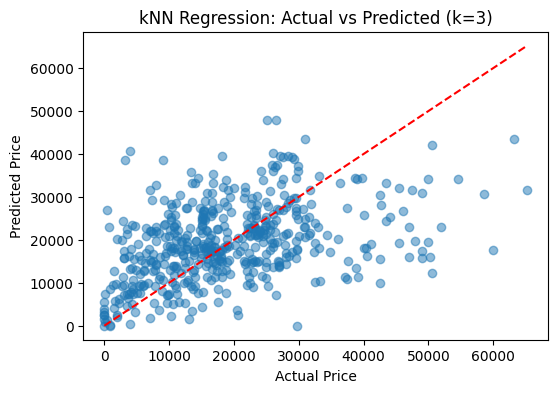

k = 10, Mean Squared Error: 111588702.61873999


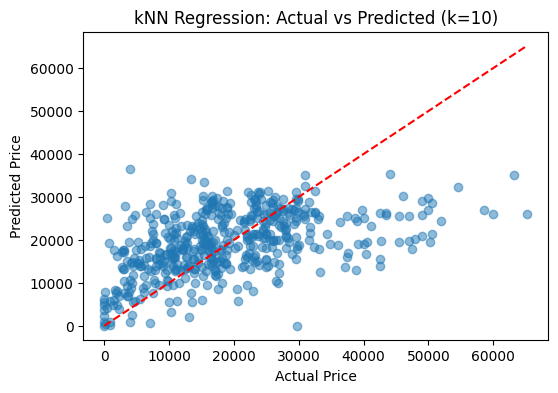

k = 25, Mean Squared Error: 104962784.87012799


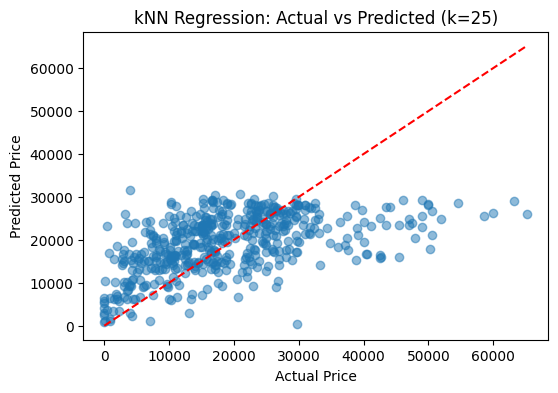

k = 50, Mean Squared Error: 103873193.2199608


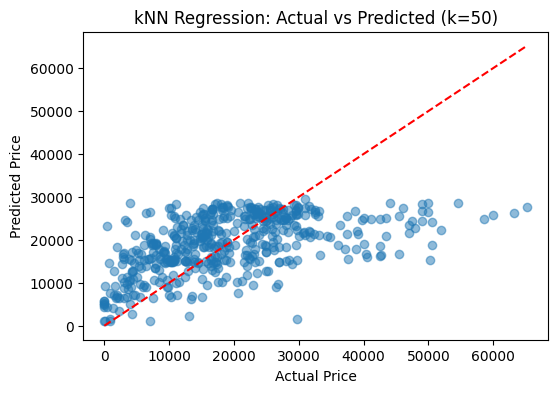

k = 100, Mean Squared Error: 104534999.25921261


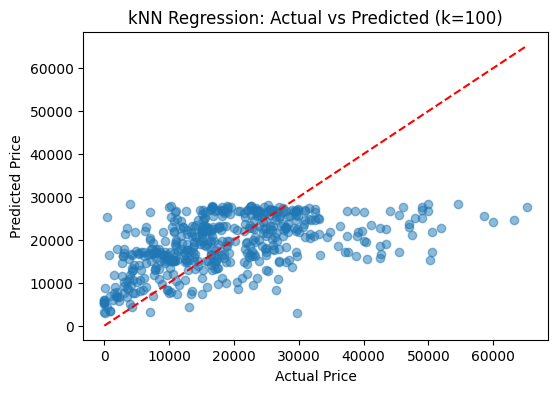

k = 300, Mean Squared Error: 107657680.73624039


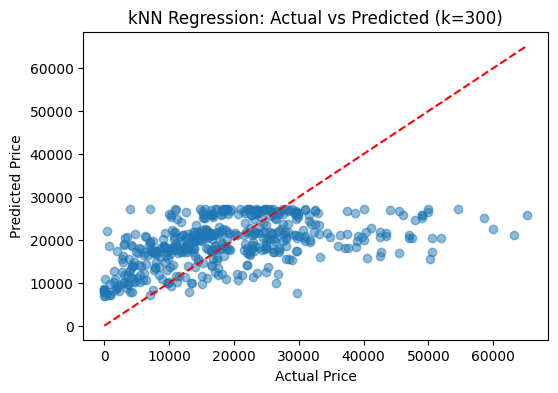

In [15]:
# Question 2.4
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_vals = [3, 10, 25, 50, 100, 300] # dictionary of k values

for k in k_vals:
    model = KNeighborsRegressor(n_neighbors=k) # KNN regressor with k neighbors
    fitted_model = model.fit(X_train, y_train)# fit model on training data
    y_hat = fitted_model.predict(X_test) # predict values for test set

    # calculate mean squared error
    mse = mean_squared_error(y_test, y_hat)

    print(f'k = {k}, Mean Squared Error: {mse}')

    # scatter plot actual vs predicted prices
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_hat, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    # creates diagonal line that prints y=x where actual price = predicted price
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'kNN Regression: Actual vs Predicted (k={k})')
    plt.show()

optimal k value: [27]


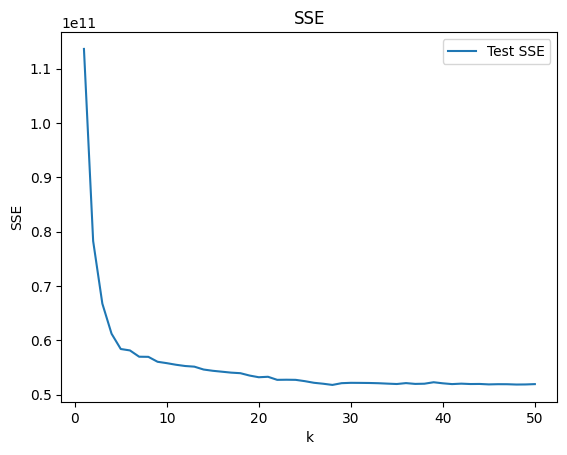

In [16]:
# Question 2.5
k_bar = 50 # Number of k's to try
SSE = [] # We'll store the SSE here
SSE_on_train = [] # saving training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0] # Find the optimal value of k
print("optimal k value:", k_star)

plt.plot(np.arange(1,k_bar+1),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

Question 2.6: With a small k value such as 3 or 10, the predicted prices closely follow the actual values but are too swayed by outliers and create a cloud rather than tightly follow the diagonal. This indicated that the model is overfitting due to high bias and low variance and captured not only the true trends but also the noise in the data. As k gets larger, the predictions become smoother and cluster more tightly around the mean but fail to capture other variance. Using large k values causes underfitting as the model is too simple.